# Kollokasjoner for nøkkelord

In [2]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [3]:
css()

In [4]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [5]:
import pandas as pd

In [6]:
import ast

In [7]:
#colls_before = pd.read_json('demokrati_before.json')

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [10]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [11]:
reference = pd.read_json('Avisdata/avis_agg.json')

In [12]:
keyword = 'fotballspiller'

In [13]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [14]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [15]:
comm = gnl.community_dict(keyword_graph)

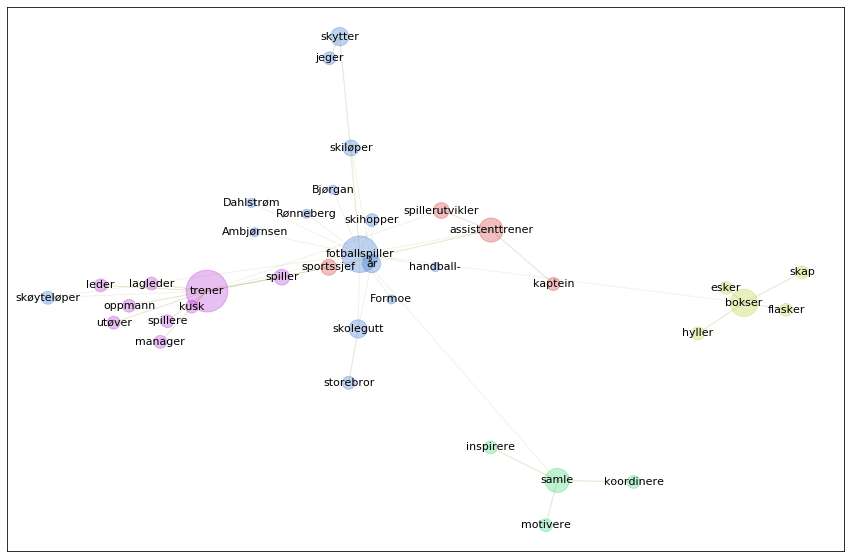

In [16]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [17]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [18]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ' ,'.join(i)))

<span style='font-size:1.1em'>fotballspiller ,skøyteløper ,trener</span>

<span style='font-size:1.1em'>skytter ,skolegutt ,skiløper ,år ,fotballspiller ,skihopper</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [19]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### bokser-hyller
<span style='font-size:1.1em'>bokser, hyller, skap, esker, flasker</span>
### samle-inspirere
<span style='font-size:1.1em'>samle, inspirere, motivere, koordinere</span>
### fotballspiller-skytter
<span style='font-size:1.1em'>fotballspiller, skytter, år, skolegutt, skiløper, jeger, skihopper, skøyteløper, storebror, Dahlstrøm, Bjørgan, Ambjørnsen, handball-, Rønneberg, Formoe</span>
### trener-spiller
<span style='font-size:1.1em'>trener, spiller, spillere, leder, lagleder, utøver, oppmann, manager, kusk</span>
### assistenttrener-spillerutvikler
<span style='font-size:1.1em'>assistenttrener, spillerutvikler, sportssjef, kaptein</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [20]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

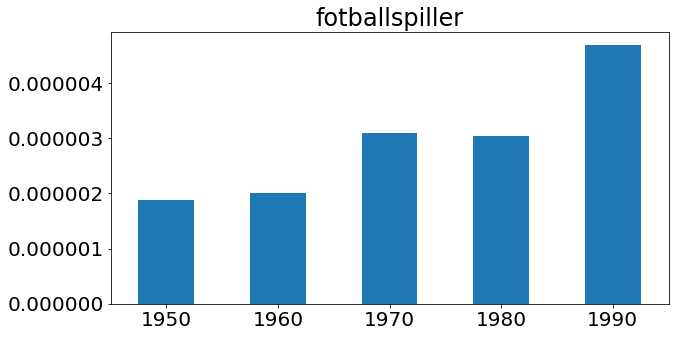

In [21]:
barchart(keyword, reference);

In [22]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.2217982808748881 minutter
1951
0.08537569443384806 minutter
1952
0.07539937098821005 minutter
1953
0.0812684178352356 minutter
1954
0.11034193038940429 minutter
1955
0.12982981999715168 minutter
1956
0.13417332569758098 minutter
1957
0.13355794350306194 minutter
1958
0.12516774733861288 minutter
1959
0.12748128573099773 minutter
1960
0.13658591906229656 minutter
1961
0.21572248935699462 minutter
1962
0.20758938392003376 minutter
1963
0.1758004347483317 minutter
1964
0.16711838245391847 minutter
1965
0.1532013495763143 minutter
1966
0.14620137214660645 minutter
1967
0.12236857811609904 minutter
1968
0.14327919085820515 minutter
1969
0.15834177732467652 minutter
1970
0.17065900564193726 minutter
1971
0.12995960315068564 minutter
1972
0.13898807764053345 minutter
1973
0.13712266286214192 minutter
1974
0.1690316875775655 minutter
1975
0.15412114063898721 minutter
1976
0.16270514329274496 minutter
1977
0.16797592639923095 minutter
1978
0.18268881638844808 minutter
1979
0.188853712876

In [23]:
colls = nb.frame(collocations)

In [24]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [25]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [26]:
agg = group_frames(colls)

In [27]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

# Sammenligner med en referanse


In [28]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0678003,0.0636145,0.0626906,0.0639755,0.0677927
",",0.0422489,0.0412801,0.0360161,0.0375341,0.0360303
i,0.0245355,0.0246246,0.0241509,0.0223459,0.020813
og,0.0207927,0.021255,0.0188187,0.0187015,0.0167394
er,0.0112082,0.0110687,0.0112091,0.0109266,0.0102024
til,0.0116211,0.0112357,0.0110929,0.010449,0.00925942
det,0.011029,0.0104679,0.00987488,0.0087761,0.00727579
som,0.0100824,0.0100878,0.00975404,0.00902762,0.00786269
for,0.00917307,0.00942805,0.00930159,0.00870384,0.00758499
av,0.00976008,0.00965961,0.00918297,0.00824812,0.00709569


In [29]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0560247,0.0537538,0.0533071,0.0563906,0.0577736
",",0.0407141,0.0424754,0.0357564,0.0350265,0.0362675
i,0.0291622,0.0316636,0.0284995,0.0268609,0.0244864
som,0.0218599,0.0239905,0.0273207,0.0271187,0.0233188
en,0.0275417,0.0253902,0.0222086,0.0222798,0.0214014
er,0.0173211,0.0181965,0.0205714,0.0216439,0.0214881
og,0.0207437,0.0262725,0.019937,0.0186733,0.0181748
han,0.0109669,0.0146929,0.0145383,0.013169,0.0119782
har,0.0103012,0.0112106,0.0132899,0.0130855,0.0119876
for,0.00952797,0.00959874,0.0110142,0.0110822,0.00998057


In [76]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

In [77]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [78]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
aktiv,9.99723e-05,8.50471e-05,8.16373e-05,5.65744e-05,3.29062e-05
profesjonell,9.99108e-05,8.33712e-05,8.18998e-05,5.79194e-05,3.36299e-05
habil,9.88283e-05,8.36806e-05,8.00842e-05,5.62842e-05,3.26485e-05
ivrig,9.86114e-05,8.31042e-05,7.89252e-05,5.46243e-05,3.21527e-05
Puskas,9.82359e-05,7.74544e-05,7.56829e-05,5.15884e-05,2.70272e-05
skiløper,9.81367e-05,8.2981e-05,7.83296e-05,5.40749e-05,3.17867e-05
yngre,9.80559e-05,8.25393e-05,7.66968e-05,5.18358e-05,3.01878e-05
idrettsmann,9.75373e-05,8.23607e-05,7.87337e-05,5.36423e-05,3.08923e-05
Matthews,9.75288e-05,8.22947e-05,7.35522e-05,5.06554e-05,2.94981e-05
årets,9.73876e-05,8.22309e-05,7.98717e-05,5.5175e-05,3.18471e-05


In [79]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
aktiv,9.99723e-05,8.50471e-05,8.16373e-05,5.65744e-05,3.29062e-05
profesjonell,9.99108e-05,8.33712e-05,8.18998e-05,5.79194e-05,3.36299e-05
habil,9.88283e-05,8.36806e-05,8.00842e-05,5.62842e-05,3.26485e-05
ivrig,9.86114e-05,8.31042e-05,7.89252e-05,5.46243e-05,3.21527e-05
Puskas,9.82359e-05,7.74544e-05,7.56829e-05,5.15884e-05,2.70272e-05
skiløper,9.81367e-05,8.2981e-05,7.83296e-05,5.40749e-05,3.17867e-05
yngre,9.80559e-05,8.25393e-05,7.66968e-05,5.18358e-05,3.01878e-05
idrettsmann,9.75373e-05,8.23607e-05,7.87337e-05,5.36423e-05,3.08923e-05
Matthews,9.75288e-05,8.22947e-05,7.35522e-05,5.06554e-05,2.94981e-05
årets,9.73876e-05,8.22309e-05,7.98717e-05,5.5175e-05,3.18471e-05


In [80]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(35).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
aktiv,9.99723e-05,8.50471e-05,8.16373e-05,5.65744e-05,3.29062e-05
habil,9.88283e-05,8.36806e-05,8.00842e-05,5.62842e-05,3.26485e-05
profesjonell,9.99108e-05,8.33712e-05,8.18998e-05,5.79194e-05,3.36299e-05
ivrig,9.86114e-05,8.31042e-05,7.89252e-05,5.46243e-05,3.21527e-05
skiløper,9.81367e-05,8.2981e-05,7.83296e-05,5.40749e-05,3.17867e-05
nominert,9.20051e-05,8.28753e-05,7.76593e-05,4.99775e-05,2.51512e-05
Pele,0,8.26959e-05,7.92345e-05,5.50286e-05,3.19395e-05
yngre,9.80559e-05,8.25393e-05,7.66968e-05,5.18358e-05,3.01878e-05
dyreste,9.55358e-05,8.24724e-05,8.10919e-05,5.66749e-05,3.33847e-05
Europas,9.34917e-05,8.23862e-05,8.05559e-05,5.59683e-05,2.98658e-05


In [81]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
profesjonell,9.99108e-05,8.33712e-05,8.18998e-05,5.79194e-05,3.36299e-05
aktiv,9.99723e-05,8.50471e-05,8.16373e-05,5.65744e-05,3.29062e-05
kåret,9.64226e-05,8.16136e-05,8.16309e-05,5.7427e-05,3.35023e-05
dyreste,9.55358e-05,8.24724e-05,8.10919e-05,5.66749e-05,3.33847e-05
Keegan,0,0,8.10119e-05,5.4196e-05,3.00947e-05
Europas,9.34917e-05,8.23862e-05,8.05559e-05,5.59683e-05,2.98658e-05
Cruyff,0,0,8.04107e-05,5.41433e-05,3.09492e-05
Kevin,0,0,8.02403e-05,5.24888e-05,2.31424e-05
karriere,9.5926e-05,8.16625e-05,8.01728e-05,5.53219e-05,3.14958e-05
Englands,9.70529e-05,8.22103e-05,8.0151e-05,5.47856e-05,3.20822e-05


In [84]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(45).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
profesjonell,9.99108e-05,8.33712e-05,8.18998e-05,5.79194e-05,3.36299e-05
kåret,9.64226e-05,8.16136e-05,8.16309e-05,5.7427e-05,3.35023e-05
Maradona,0,0,7.4968e-05,5.69248e-05,3.25078e-05
dyreste,9.55358e-05,8.24724e-05,8.10919e-05,5.66749e-05,3.33847e-05
aktiv,9.99723e-05,8.50471e-05,8.16373e-05,5.65744e-05,3.29062e-05
habil,9.88283e-05,8.36806e-05,8.00842e-05,5.62842e-05,3.26485e-05
Diego,0,0,6.53934e-05,5.60471e-05,3.20202e-05
Platini,0,0,7.41618e-05,5.60016e-05,3.0475e-05
Europas,9.34917e-05,8.23862e-05,8.05559e-05,5.59683e-05,2.98658e-05
beste,9.45257e-05,8.06541e-05,7.96697e-05,5.58196e-05,3.25298e-05


In [83]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
profesjonell,9.99108e-05,8.33712e-05,8.18998e-05,5.79194e-05,3.36299e-05
kåret,9.64226e-05,8.16136e-05,8.16309e-05,5.7427e-05,3.35023e-05
dyreste,9.55358e-05,8.24724e-05,8.10919e-05,5.66749e-05,3.33847e-05
verdens,8.99217e-05,8.04175e-05,7.74966e-05,5.57527e-05,3.32326e-05
aktiv,9.99723e-05,8.50471e-05,8.16373e-05,5.65744e-05,3.29062e-05
fotballspiller,9.67392e-05,8.0809e-05,7.82135e-05,5.57167e-05,3.27889e-05
Ronaldo,0,0,0,0,3.27412e-05
habil,9.88283e-05,8.36806e-05,8.00842e-05,5.62842e-05,3.26485e-05
beste,9.45257e-05,8.06541e-05,7.96697e-05,5.58196e-05,3.25298e-05
Maradona,0,0,7.4968e-05,5.69248e-05,3.25078e-05


<br>
<br>

In [38]:
pmi.to_csv(filename)

# Assosiasjoner og variasjon over år.

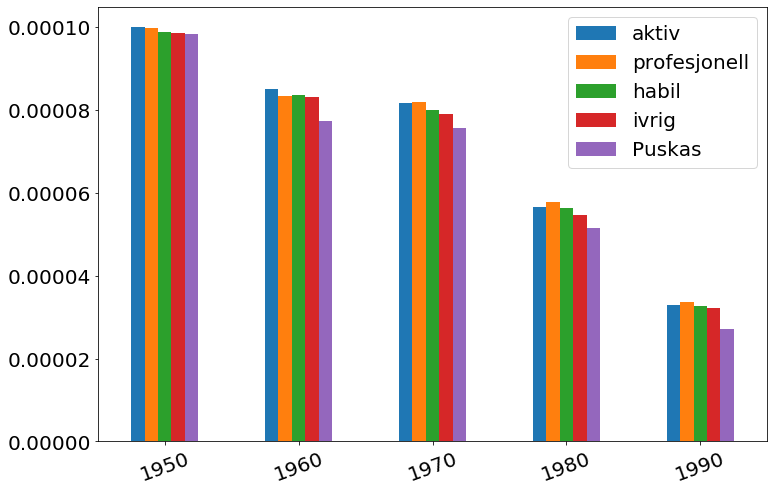

In [39]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [40]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

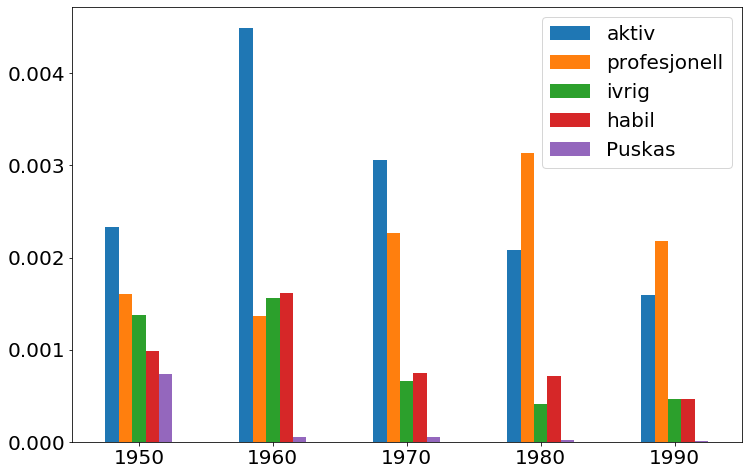

In [41]:
freq_assoc_val(agg, pmi, 0)

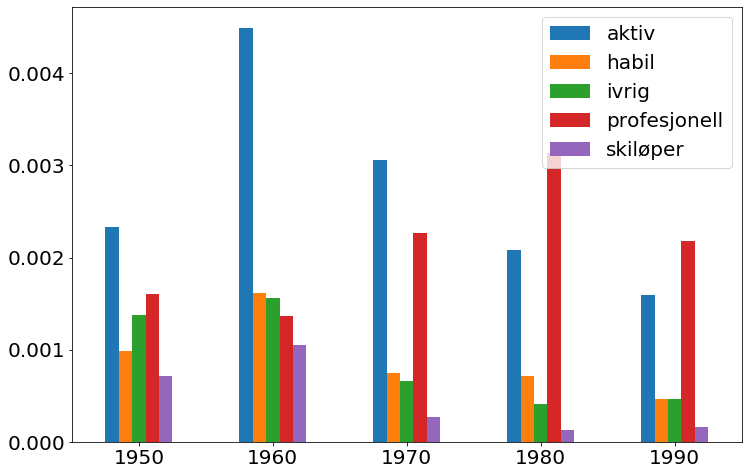

In [42]:
freq_assoc_val(agg, pmi, 1)

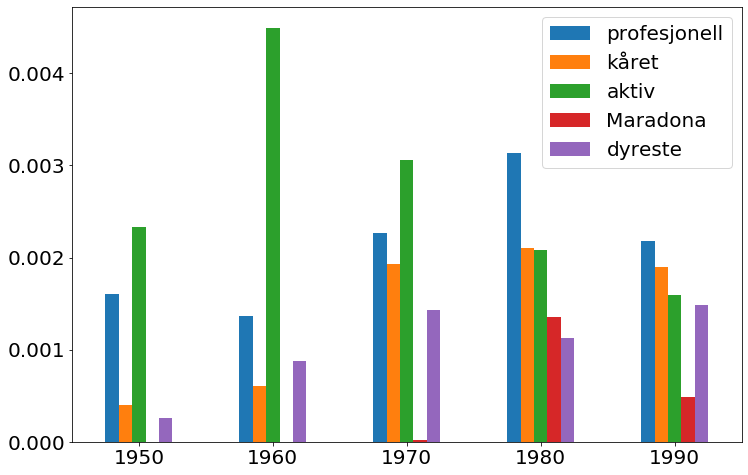

In [43]:
freq_assoc_val(agg, pmi, 3)

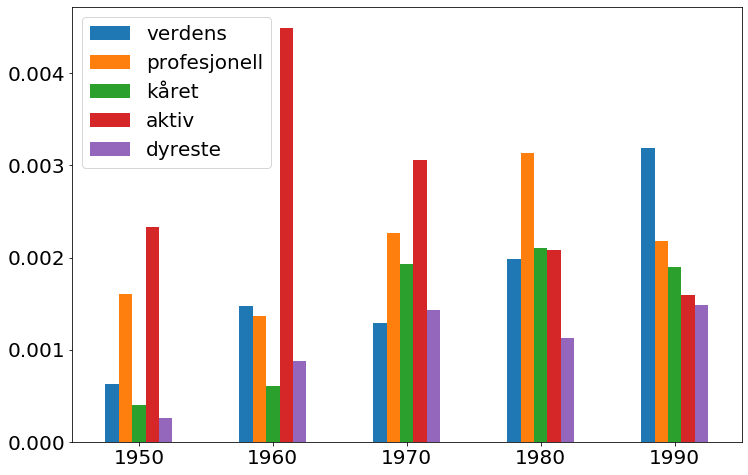

In [44]:
freq_assoc_val(agg, pmi, 4)

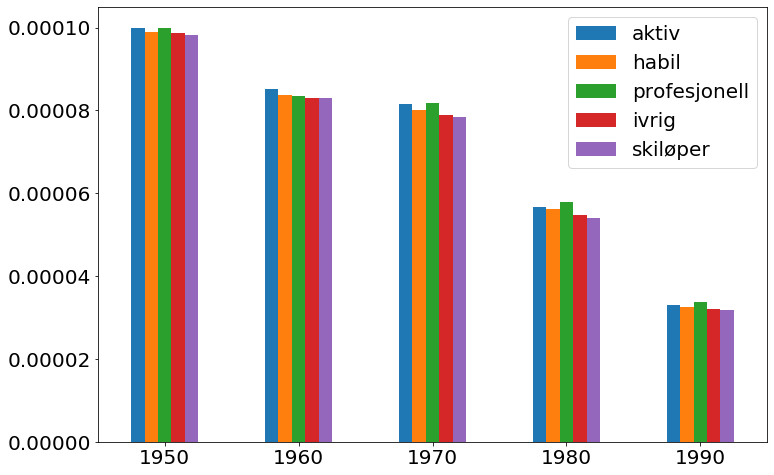

In [45]:
freq_assoc_val(pmi, pmi, 1)

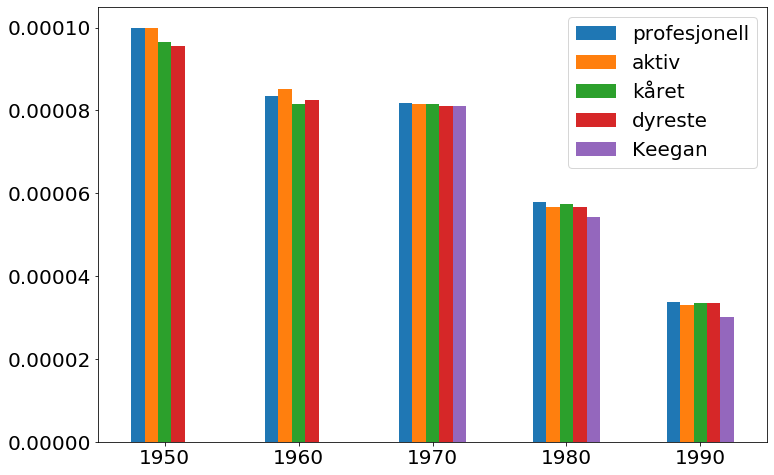

In [46]:
freq_assoc_val(pmi, pmi, 2)

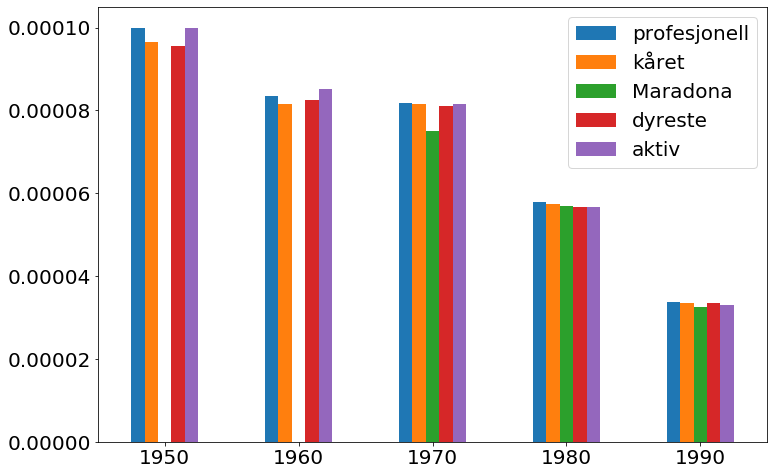

In [47]:
freq_assoc_val(pmi, pmi, 3)

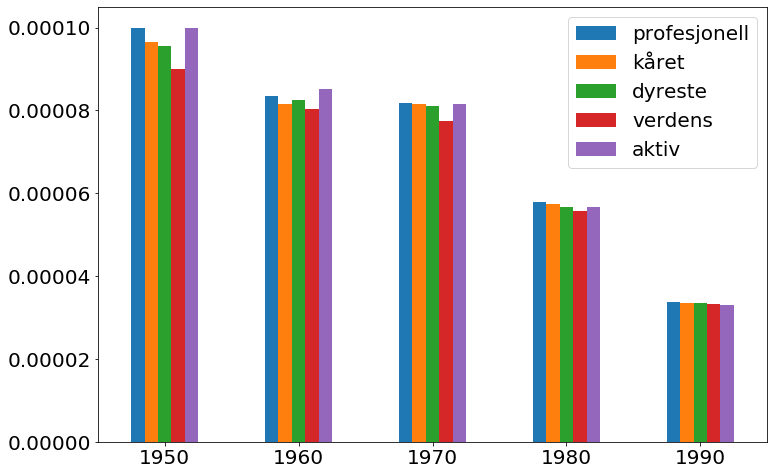

In [48]:
freq_assoc_val(pmi, pmi, 4)

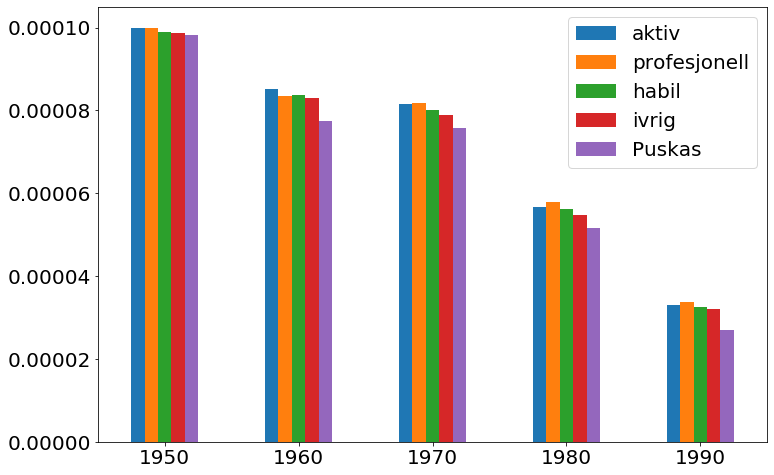

In [49]:
freq_assoc_val(pmi, pmi, 0)

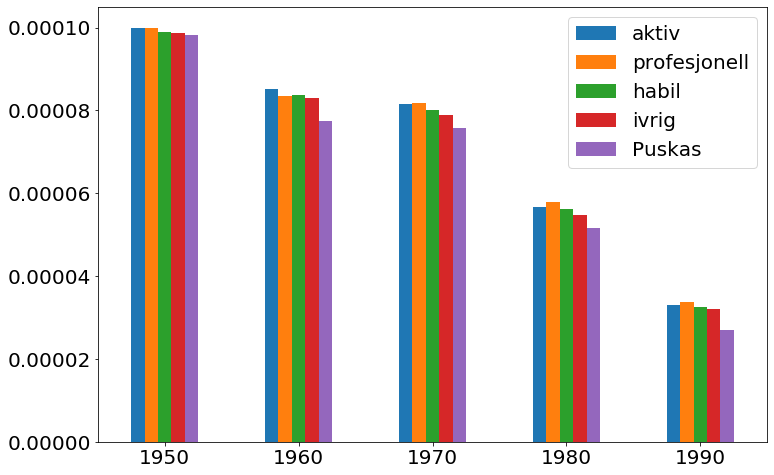

In [50]:
freq_assoc_val(pmi, pmi, 0)

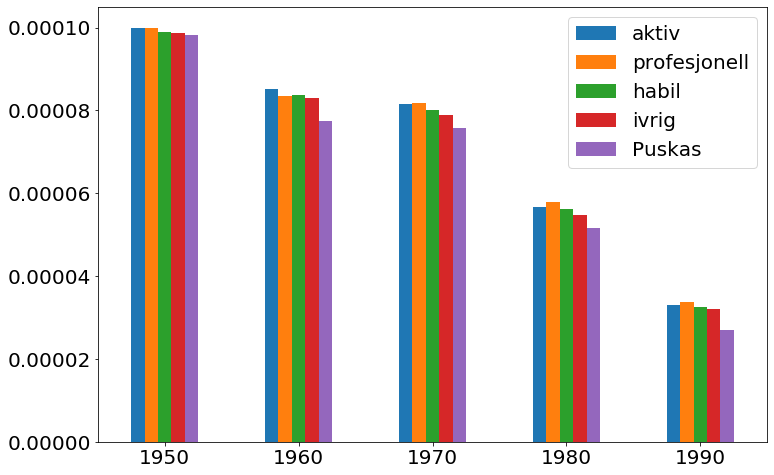

In [51]:
freq_assoc_val(pmi, pmi, 0)

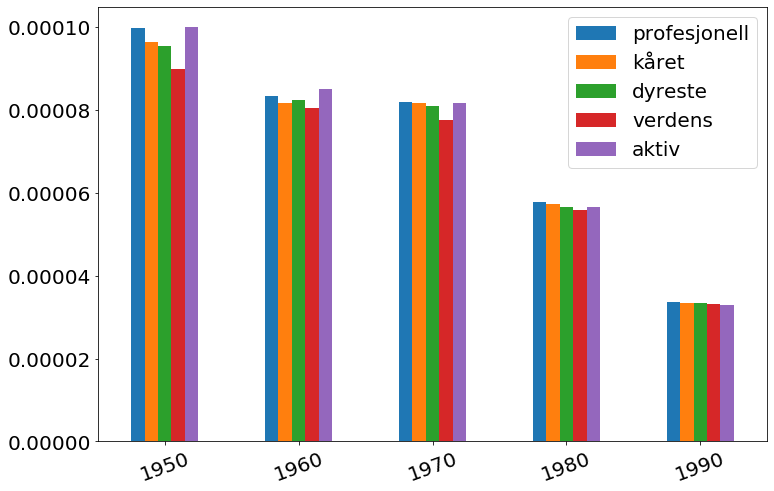

In [52]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

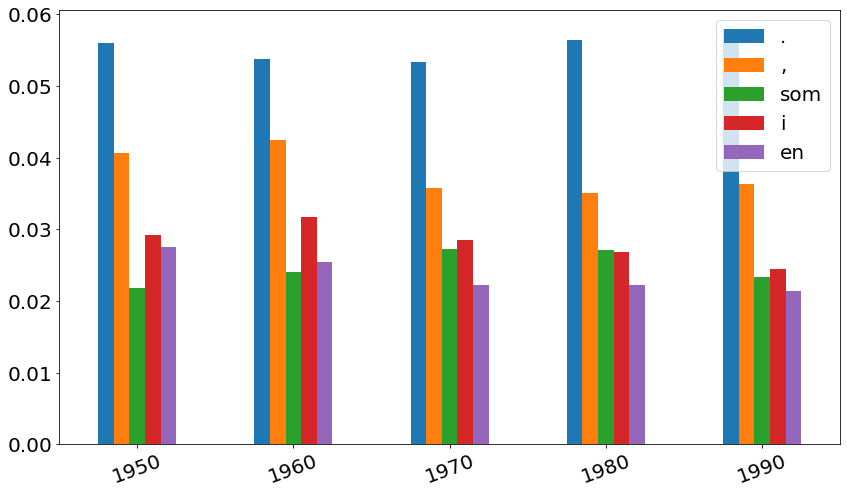

In [53]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [54]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Keegan, Europas, Cruyff, Kevin, Englands, Pele, Tidenes, Blokhin, Dutte, Allan, Latchford, Gullballen, Oleg, Årets, Arets, Hamburger, Pelé, Savoldi, Beckenbauer, Bobby, Johann, A-lag, Liverpools, Fotballklubb, Francis, Barcelona, Instruksjonsheftet, Best, Eusebio, Kenny, Haag, Sarr, Moore, Søder, Sportverein, Rosenborgs, Bens, Brasils, Guiseppe, Fotballspiller, Daniels, Callaghan, Clarke, Sivert, Coventrys, Westereng, McDermott, Ajax, Alan, Ball, Jennings, Peters, Chiefs, England, Bundesligalaget</span>

## adj
<span style='font-size:1.1em'>profesjonell, aktiv, dyreste, habil, beste, ivrig, lovende, eminent, profesjonelle, dyktig, glimrende, yngre</span>
## verb
<span style='font-size:1.1em'>kåret, nominert, turner, karet, klubb</span>
## subst
<span style='font-size:1.1em'>karriere, skihopper, idrettsmann, landskamper, ambisjoner, skiløper, fotballspiller, landslaget, offside, midtbanespiller, avstemning, skisse, skøyteløper, statuett, sportsjournalistene</span>
## unknown
<span style='font-size:1.1em'>årets, tidenes, friidrettsmann, verdens, skiloper, fotballkarriere, proffesjonell, fotballdommer, sportsklubben, kneskade, idrettsadministrasjonen, prøvespille, gullballen</span>


# Hvordan utvikler ordene seg?

In [55]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

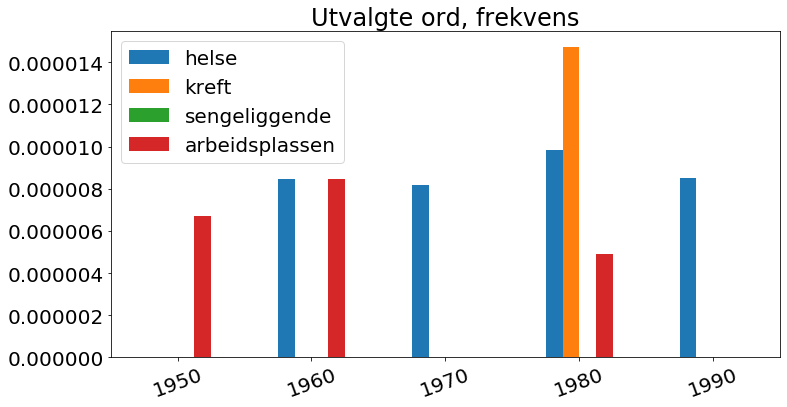

In [56]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

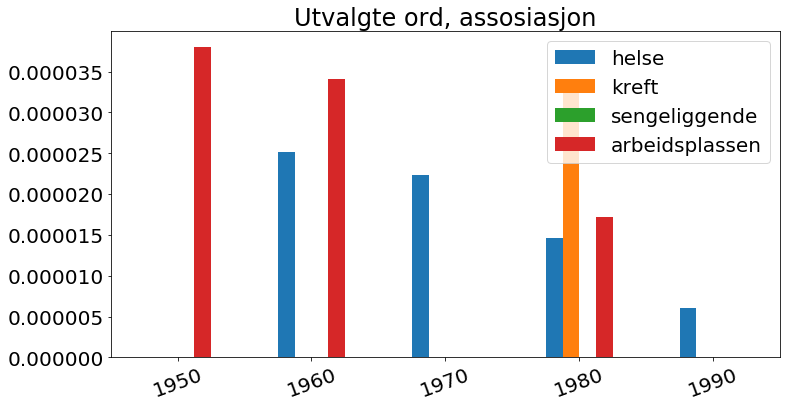

In [57]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

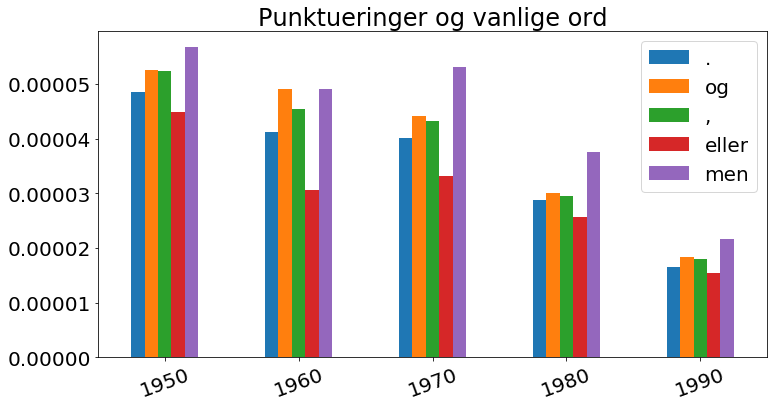

In [58]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

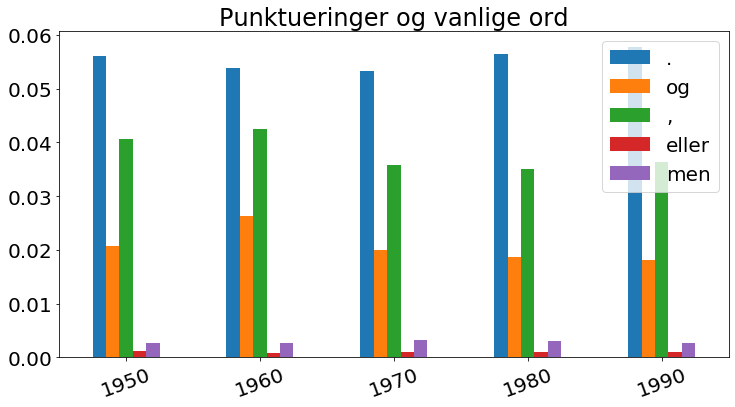

In [59]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [60]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

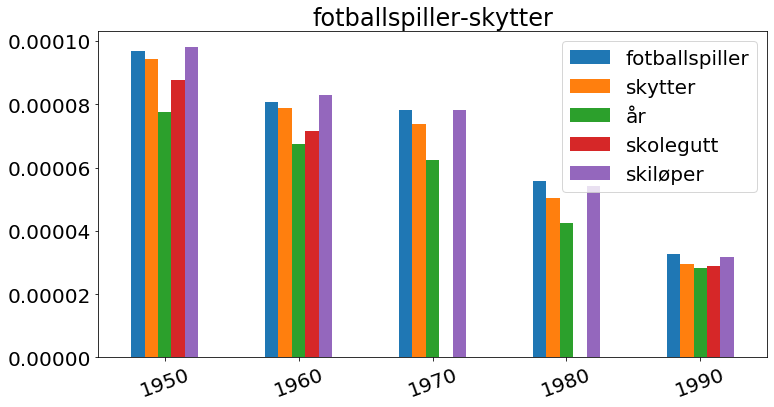

In [61]:
commchart(2, (0,5));

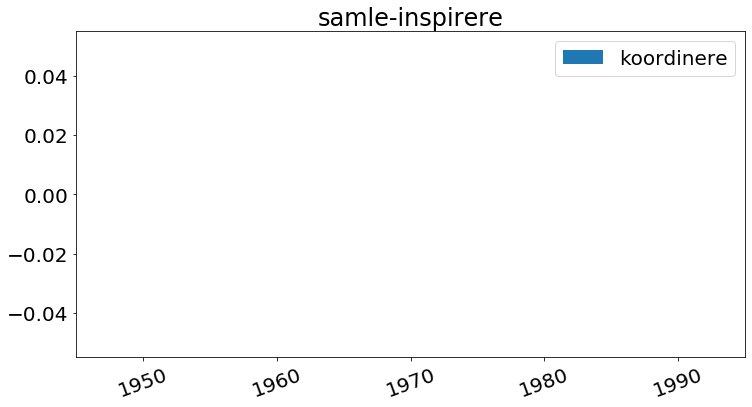

In [62]:
commchart(1, (3, 8))

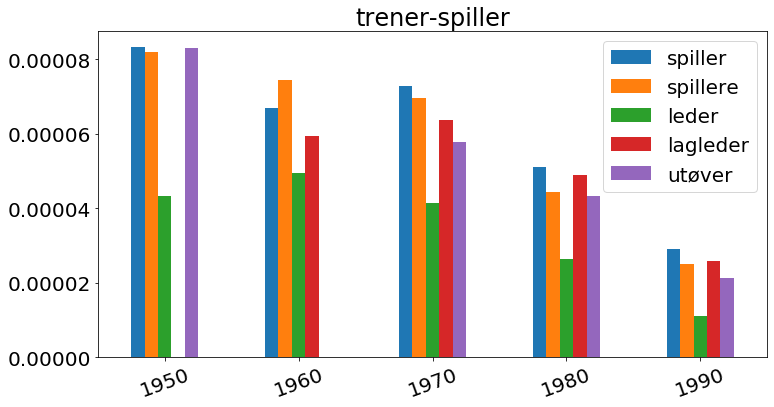

In [63]:
commchart(3)